<a href="https://colab.research.google.com/github/minhyuk0914/eXplanable_AI/blob/main/SHAP/Regression_Shap_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression_Shap_values

## Library Install & Import

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import keras


import shap

## Data Load & EDA

In [3]:
X, y = shap.datasets.california()

* 'MedInc' : median income (중위소득)
* 'HouseAge' : median House age in block (주택 중위연령)
* 'AveRoom' : average numbers of rooms (방 평균 개수)
* 'Population' : block population (인구)
* 'AveOccup' : average house occupancy (평균 주택 점유율)
* 'Latitude' : 위도
* 'Longitude' : 경도


---
* y(target) : median house value (주택 중위 가격)

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
# HOUSING_PRICES
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
X.shape, len(y)

((20640, 8), 20640)

In [8]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

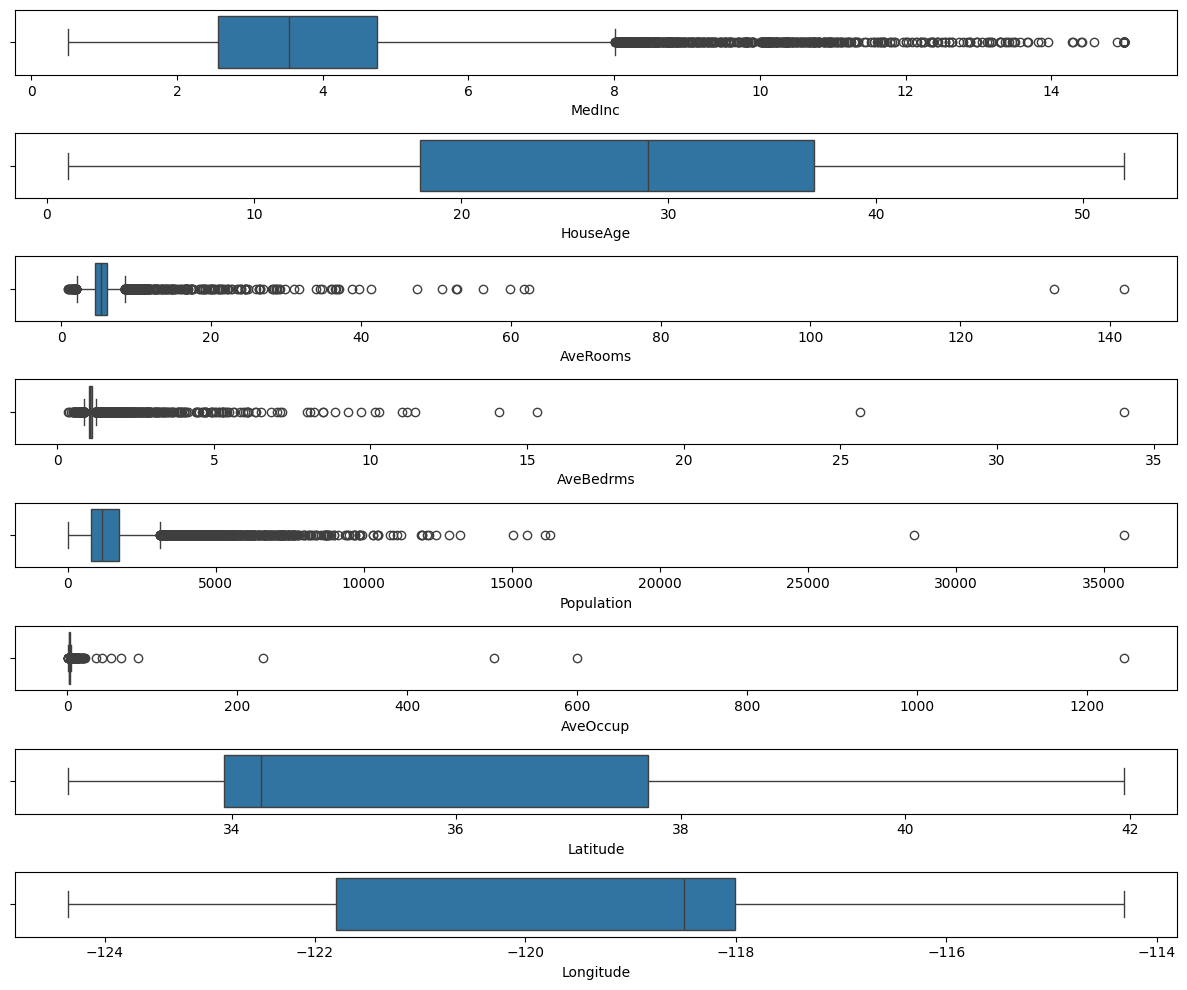

In [9]:
plt.figure(figsize = (12, 10))
for idx in range(len(X.columns)):
    plt.subplot(len(X.columns), 1, idx + 1)
    sns.boxplot(data = X, x = X.columns[idx])

plt.tight_layout()
plt.show()

## Train & Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Tree SHAP
> 트리 기반 모델 (XGB, LGBM, DT.. )

In [11]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)

In [13]:
shap_values

.values =
array([[-6.04306412e-02,  1.04331886e-01,  2.98423446e-02, ...,
        -1.73837656e-01, -1.35788755e-01,  7.58756735e-01],
       [-2.34018391e-01,  2.81903494e-02, -3.29297286e-02, ...,
        -3.72291462e-01, -5.41718343e-01,  2.38931550e-01],
       [-8.91020338e-01, -9.90399985e-03,  2.22475106e-01, ...,
        -1.07328713e-01, -4.34043675e-01,  1.80151383e-01],
       ...,
       [-9.60561156e-01,  4.07023685e-02,  1.51929184e-02, ...,
         6.67869487e-03,  5.12457338e-02, -7.88560440e-02],
       [-4.37992379e-01, -8.12120300e-02,  5.81633493e-03, ...,
         4.85724844e-04,  2.46256301e-01, -3.46177899e-01],
       [-7.74022493e-01,  3.09858094e-02,  1.04682404e-02, ...,
        -4.82954562e-02, -3.77665296e-01,  3.49795816e-01]])

.base_values =
array([2.07735064, 2.07735064, 2.07735064, ..., 2.07735064, 2.07735064,
       2.07735064])

.data =
array([[   3.1908    ,   52.        ,    5.        , ...,    3.11702128,
          37.71      , -122.43      ],
    

In [14]:
shap_values[0, :]

.values =
array([-0.06043064,  0.10433189,  0.02984234, -0.01905587, -0.02516868,
       -0.17383766, -0.13578876,  0.75875674])

.base_values =
2.077350641957364

.data =
array([   3.1908    ,   52.        ,    5.        ,    1.0141844 ,
        879.        ,    3.11702128,   37.71      , -122.43      ])

In [15]:
x_train.shape, shap_values.shape

((16512, 8), (16512, 8))

### summary_plot


---
**전체 Feature들이 Shap value 분포에 어떤 영향을 미치는지 시각화**

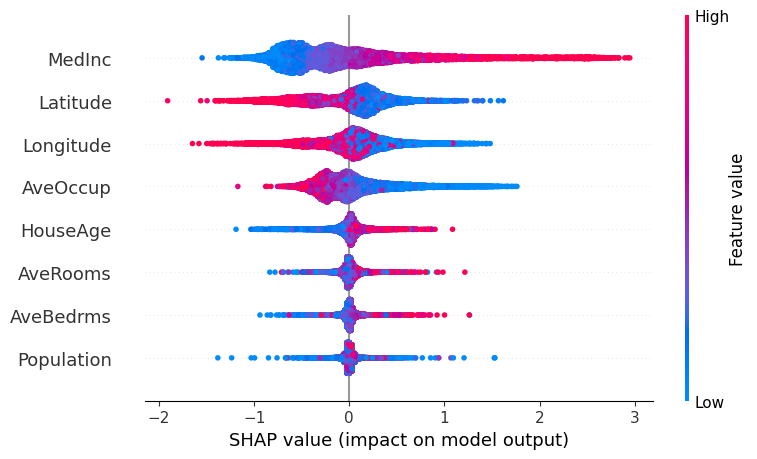

In [16]:
shap.summary_plot(shap_values, x_train)

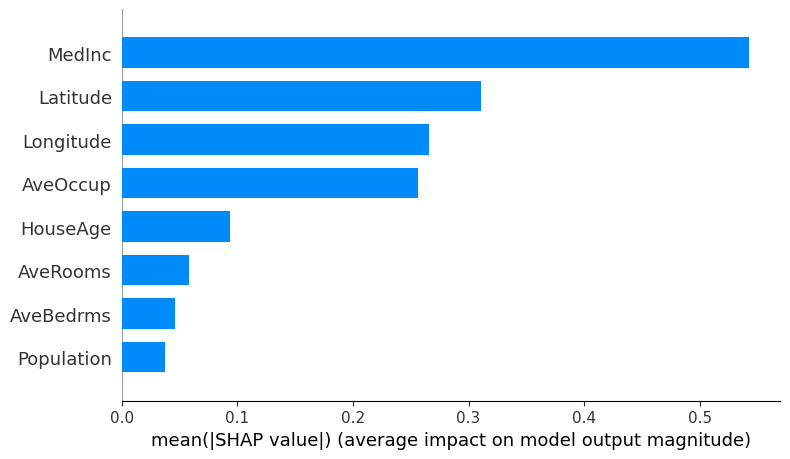

In [17]:
# 각 Feature가 모델에 미치는 영향 파악 (Feature Importance)
shap.summary_plot(shap_values, x_train, plot_type = 'bar')

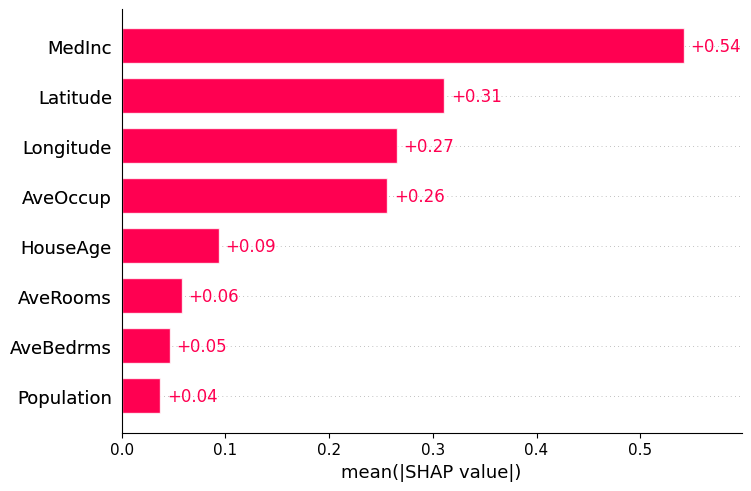

In [18]:
shap.plots.bar(shap_values)

### waterfall_plot

---

특정 데이터 하나에 대해, Shap value 시각화
* 모든 Feature의 data 값 표시
* 모든 Feature의 Shap value 표시


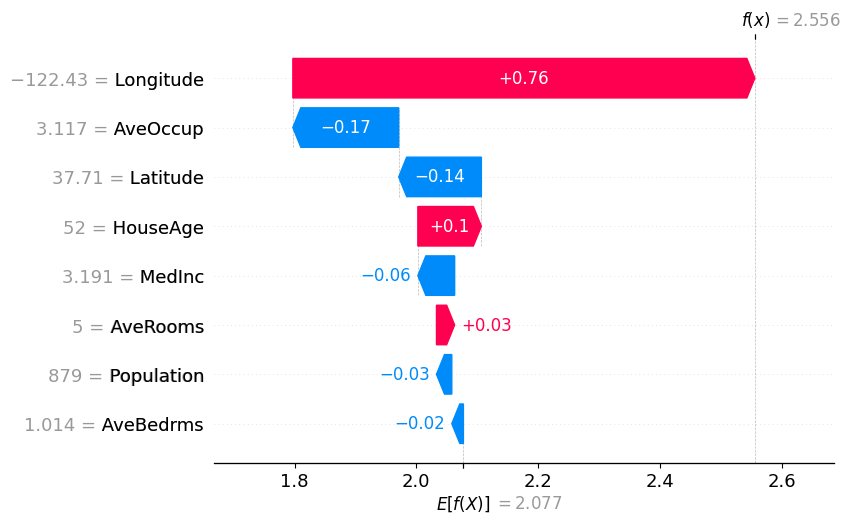

In [19]:
# 첫 번째 데이터에 대한 SHAP 시각화
shap.plots.waterfall(shap_values[0])

### force_plot

---

특정 데이터 하나 또는 전체 데이터에 대해, Shap value 시각화
**굵은 텍스트**
* waterfall_plot 과 차이점
> * Shap value를 1차원 평면에 정렬해서 보여줌
 * 전체 데이터 시각화 가능


In [20]:
# 첫 번째 데이터에 대한 SHAP 시각화
shap.initjs()
display(shap_values[0, :])
print("=" * 50)
display(x_train.iloc[0, :])
print("=" * 50)
display(y_train[0])
shap.plots.force(shap_values[0, :], x_train.iloc[0, :])

.values =
array([-0.06043064,  0.10433189,  0.02984234, -0.01905587, -0.02516868,
       -0.17383766, -0.13578876,  0.75875674])

.base_values =
2.077350641957364

.data =
array([   3.1908    ,   52.        ,    5.        ,    1.0141844 ,
        879.        ,    3.11702128,   37.71      , -122.43      ])

MedInc          3.190800
HouseAge       52.000000
AveRooms        5.000000
AveBedrms       1.014184
Population    879.000000
AveOccup        3.117021
Latitude       37.710000
Longitude    -122.430000
Name: 15961, dtype: float64

2.556

* 해석
> * x_train의 1번째 행의 데이터에 대한 Shap value 시각화
 * x_train의 1번째 행의 데이터에 대한 y 값은 2.56 이다.
 * y값에 긍정적인 영향(higher)을 준 feature 는 "Longitude" 이다.
 * y값에 부정적인 영향(lower)을 준 feature는 "AveOccup" 이다.




In [21]:
# 이상치 데이터에 대한 SHAP 시각화
shap.initjs()
display(shap_values[1000, :])
print("=" * 50)
display(x_train.iloc[1000, :])
print("=" * 50)
display(y_train[1000])
shap.plots.force(shap_values[1000, :], x_train.iloc[1000, :])

.values =
array([-0.75738676,  0.03055733, -0.00455484,  0.0116347 , -0.00217096,
       -0.14891119,  0.00819031, -0.48270923])

.base_values =
2.077350641957364

.data =
array([ 1.94720000e+00,  4.00000000e+01,  5.02649007e+00,  1.09933775e+00,
        1.39100000e+03,  3.07064018e+00,  3.39300000e+01, -1.16980000e+02])

MedInc           1.947200
HouseAge        40.000000
AveRooms         5.026490
AveBedrms        1.099338
Population    1391.000000
AveOccup         3.070640
Latitude        33.930000
Longitude     -116.980000
Name: 12289, dtype: float64

0.732

* 이상치 데이터 해석
> * x_train의 1000번째 행의 데이터에 대한 Shap value 시각화
 * x_train의 1000번째 행의 데이터에 대한 y 값은 0.73 이다.
 * 중위 소득(MedInc)의 shap value 가 음수 이므로, 중위 소득이 증가할수록 주택 가격(y)가 낮아지는 경향이 있다. == 중위 소득이 낮은 지역은 주택 가격이 높게 형성된다.
 * 경도(Longitude)가 주택 가격에 크게 영향을 미친다.

In [25]:
# 전체 데이터에 대한 SHAP 시각화
shap.initjs()
shap.plots.force(shap_values[:1000], x_train[:1000])   # 데이터의 양이 크기에 1000개만 샘플링하여 시각화

### dependence_plot

---
**두 변수 사이의 영향력 시각화**

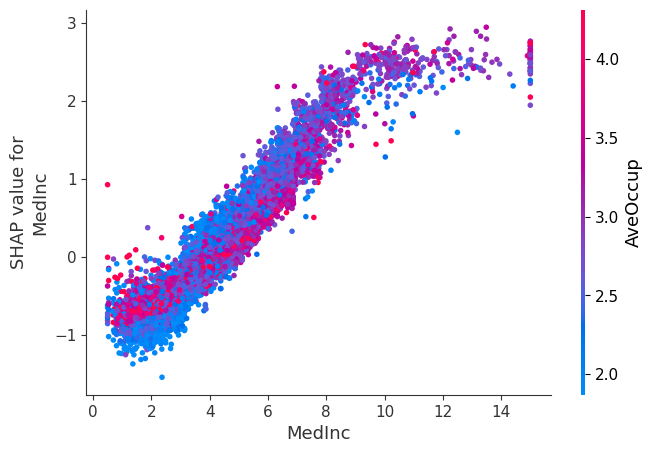

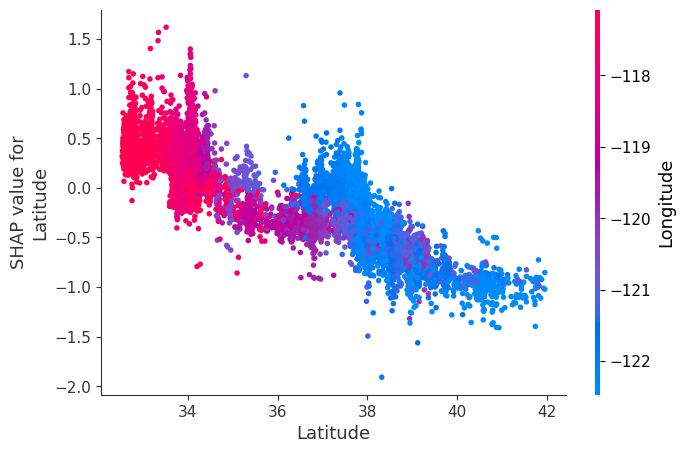

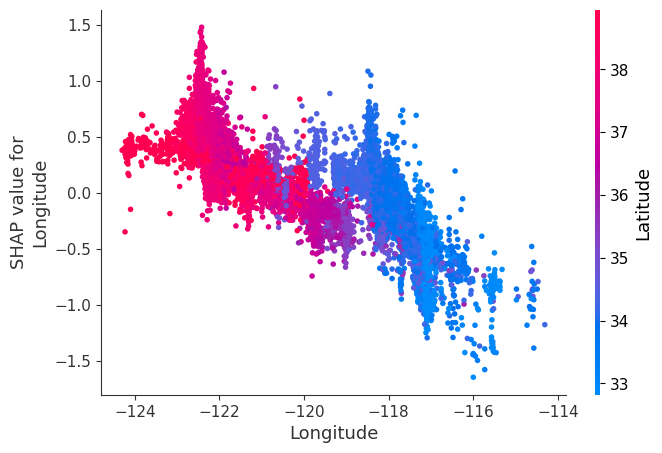

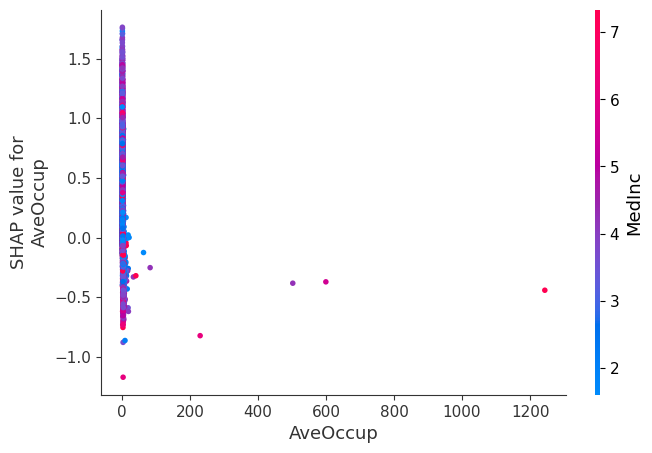

In [26]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values.values), 0))   # 각각의 Feature에 대해 Shap Value의 전체 합

# 영향력이 큰 변수들 순서대로 출력
for i in range(4):  # 4개 시각화
    shap.dependence_plot(top_inds[i], shap_values.values, x_train)